# Notebook used to help create:

- importing data src
- precprocessing data src

In [1]:
%pwd

'C:\\Users\\bjk1y13\\OneDrive - University of Southampton\\MH028_UHS_Weather\\4_Analysis\\EDclassification\\notebooks\\model'

In [2]:
import pandas as pd
import numpy as np
from src.data.io import import_pickled_feature_dfs, import_merge_prevday_target_column, import_merge_pickled_target_class

# Import data

In [3]:
features = import_pickled_feature_dfs('../../data/interim/D2_timeseries/', ['EDdaily.pkl', 'IPdaily.pkl', 'callender.pkl'])

In [4]:
features.shape

(2465, 13)

In [5]:
features.tail()

,EDDAILYattendances,EDDAILYadmissions,EDDAILYage_mean,EDDAILYage_75plus,IPDAILYpatients_total,IPDAILYpatients_nonelec,IPDAILYpatients_elec,IPDAILYpatients_daycase,IPDAILYage_mean_elecnonelec,IPDAILYage_75plus_elecnonelec,year,month,dayofweek
,,,,,,,,,,,,,
2018-09-26,446,182,42.9126,62,2,1,1,0,35.5,0,2018,9,Wednesday
2018-09-27,487,188,44.7064,82,2,1,1,0,35.5,0,2018,9,Thursday
2018-09-28,482,168,44.1992,74,2,1,1,0,35.5,0,2018,9,Friday
2018-09-29,463,191,46.4989,84,1,0,1,0,0,0,2018,9,Saturday
2018-09-30,367,157,40.3597,47,1,0,1,0,0,0,2018,9,Sunday


In [6]:
target = pd.read_pickle('../../data/interim/EDooc_class.pkl')

In [7]:
features = target.merge(features, right_index=True, left_index=True)

Remember target does not need to be offset because features were calculated for the previous days records

In [8]:
features_final = features.copy()
# features_final['flag_target'] = features_final['flag_target'].shift(-1)
##### we do shift the EDocc col as this is for the current date in index.
features_final['EDocc'] = features_final['EDocc'].shift(1)

In [9]:
features_final.rename(columns={'EDocc':'TARGET_prevday'},inplace=True)

In [10]:
features_final['flag_target_prevday'] = features_final['flag_target'].shift(1)

In [11]:
features_final.flag_target.value_counts()

0    2094
1     371
Name: flag_target, dtype: int64

In [12]:
features_final.head()

,TARGET_prevday,flag_target,EDDAILYattendances,EDDAILYadmissions,EDDAILYage_mean,EDDAILYage_75plus,IPDAILYpatients_total,IPDAILYpatients_nonelec,IPDAILYpatients_elec,IPDAILYpatients_daycase,IPDAILYage_mean_elecnonelec,IPDAILYage_75plus_elecnonelec,year,month,dayofweek,flag_target_prevday
dt_date,,,,,,,,,,,,,,,,
2012-01-01,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,1,Sunday,NaN
2012-01-02,55.750000,0,377,151,40.0186,59,1185,1001,141,43,57.3814,441,2012,1,Monday,1.0
2012-01-03,38.541667,0,350,139,42.2114,44,1228,1037,141,50,57.4292,453,2012,1,Tuesday,0.0
2012-01-04,40.208333,0,356,125,45.1011,58,1564,1074,208,282,55.5352,475,2012,1,Wednesday,0.0
2012-01-05,32.375000,0,284,92,42.5035,49,1535,1066,241,228,55.4072,482,2012,1,Thursday,0.0


In [13]:
features_final.drop(['EDDAILYattendances',
       'EDDAILYadmissions', 'EDDAILYage_mean', 'EDDAILYage_75plus',
       'IPDAILYpatients_total', 'IPDAILYpatients_nonelec',
       'IPDAILYpatients_elec', 'IPDAILYpatients_daycase',
       'IPDAILYage_mean_elecnonelec', 'IPDAILYage_75plus_elecnonelec'],axis=1, inplace=True)

In [14]:
features_final.columns

Index(['TARGET_prevday', 'flag_target', 'year', 'month', 'dayofweek',
       'flag_target_prevday'],
      dtype='object')

IP occ data after 2018-5-31 is not valid. NOTE: must check if that is same in RAW.

## Add new lagged and derivative features

In [15]:
features_final = features_final.copy()

In [20]:
from src.features.feature_gen import create_lagged_vars_list

features_final = create_lagged_vars_list(features_final, 'TARGET_prevday', [6,13,27])

In [21]:
features_final.head()

,TARGET_prevday,flag_target,year,month,dayofweek,flag_target_prevday,TARGET_prevday_lag6,TARGET_prevday_lag13,TARGET_prevday_lag27,TARGET_prevday_deriv1_lag1,...,TARGET_prevday_deriv1_lag5,TARGET_prevday_deriv2_lag5,TARGET_prevday_deriv1_lag6,TARGET_prevday_deriv2_lag6,TARGET_prevday_deriv1_lag7,TARGET_prevday_deriv2_lag7,TARGET_prevday_deriv1_lag13,TARGET_prevday_deriv2_lag13,TARGET_prevday_deriv1_lag27,TARGET_prevday_deriv2_lag27
dt_date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,NaN,1,2012,1,Sunday,NaN,NaN,NaN,NaN,-17.208333,...,-21.625,19.708333,-18.5,16.666667,-19.416667,20.0,-23.416667,19.416667,-20.125,26.833333
2012-01-02,55.750000,0,2012,1,Monday,1.0,NaN,NaN,NaN,-17.208333,...,-21.625,19.708333,-18.5,16.666667,-19.416667,20.0,-23.416667,19.416667,-20.125,26.833333
2012-01-03,38.541667,0,2012,1,Tuesday,0.0,NaN,NaN,NaN,-17.208333,...,-21.625,19.708333,-18.5,16.666667,-19.416667,20.0,-23.416667,19.416667,-20.125,26.833333
2012-01-04,40.208333,0,2012,1,Wednesday,0.0,NaN,NaN,NaN,1.666667,...,-21.625,19.708333,-18.5,16.666667,-19.416667,20.0,-23.416667,19.416667,-20.125,26.833333
2012-01-05,32.375000,0,2012,1,Thursday,0.0,NaN,NaN,NaN,-7.833333,...,-21.625,19.708333,-18.5,16.666667,-19.416667,20.0,-23.416667,19.416667,-20.125,26.833333


In [22]:
from src.features.feature_gen import perform_deriv_cals_multiple_columns

In [23]:
lags_required = {'TARGET_prevday':[1,2,3,4,5,6,7,13,27]} 
features_final = perform_deriv_cals_multiple_columns(features_final, lags_required, 2)

In [24]:
features_final.head()

,TARGET_prevday,flag_target,year,month,dayofweek,flag_target_prevday,TARGET_prevday_lag6,TARGET_prevday_lag13,TARGET_prevday_lag27,TARGET_prevday_deriv1_lag1,...,TARGET_prevday_deriv1_lag5,TARGET_prevday_deriv2_lag5,TARGET_prevday_deriv1_lag6,TARGET_prevday_deriv2_lag6,TARGET_prevday_deriv1_lag7,TARGET_prevday_deriv2_lag7,TARGET_prevday_deriv1_lag13,TARGET_prevday_deriv2_lag13,TARGET_prevday_deriv1_lag27,TARGET_prevday_deriv2_lag27
dt_date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,NaN,1,2012,1,Sunday,NaN,NaN,NaN,NaN,-17.208333,...,-21.625,19.708333,-18.5,16.666667,-19.416667,20.0,-23.416667,19.416667,-20.125,26.833333
2012-01-02,55.750000,0,2012,1,Monday,1.0,NaN,NaN,NaN,-17.208333,...,-21.625,19.708333,-18.5,16.666667,-19.416667,20.0,-23.416667,19.416667,-20.125,26.833333
2012-01-03,38.541667,0,2012,1,Tuesday,0.0,NaN,NaN,NaN,-17.208333,...,-21.625,19.708333,-18.5,16.666667,-19.416667,20.0,-23.416667,19.416667,-20.125,26.833333
2012-01-04,40.208333,0,2012,1,Wednesday,0.0,NaN,NaN,NaN,1.666667,...,-21.625,19.708333,-18.5,16.666667,-19.416667,20.0,-23.416667,19.416667,-20.125,26.833333
2012-01-05,32.375000,0,2012,1,Thursday,0.0,NaN,NaN,NaN,-7.833333,...,-21.625,19.708333,-18.5,16.666667,-19.416667,20.0,-23.416667,19.416667,-20.125,26.833333


In [25]:
%matplotlib inline

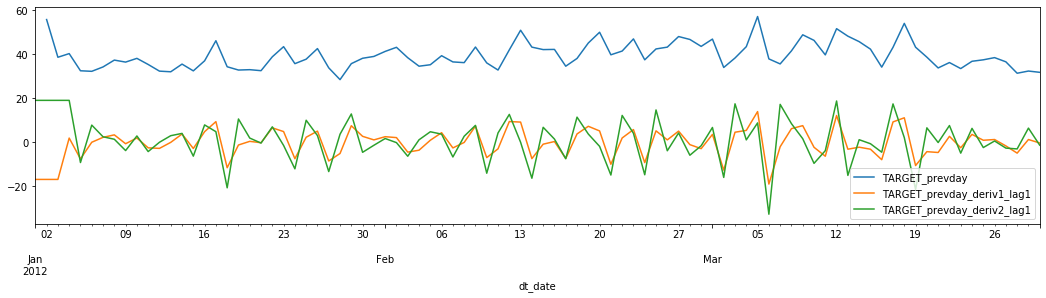

In [26]:
features_final[['TARGET_prevday','TARGET_prevday_deriv1_lag1','TARGET_prevday_deriv2_lag1']].iloc[0:90].plot(figsize=(18,4))

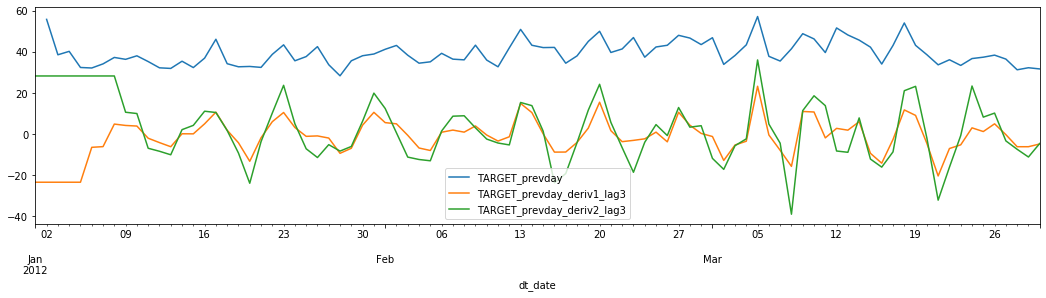

In [27]:
features_final[['TARGET_prevday','TARGET_prevday_deriv1_lag3','TARGET_prevday_deriv2_lag3']].iloc[0:90].plot(figsize=(18,4))

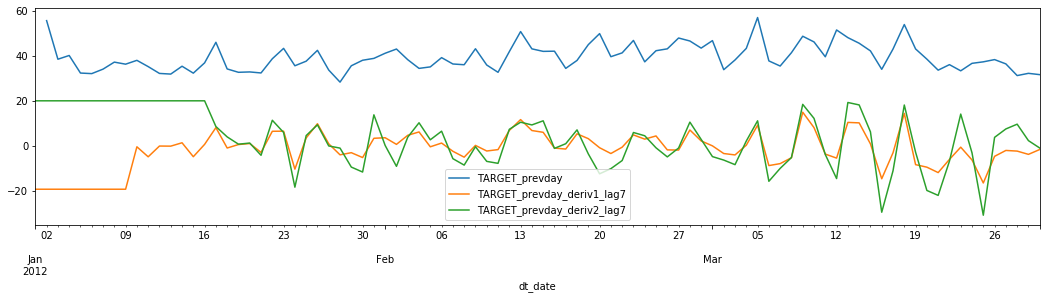

In [28]:
features_final[['TARGET_prevday','TARGET_prevday_deriv1_lag7','TARGET_prevday_deriv2_lag7']].iloc[0:90].plot(figsize=(18,4))

In [29]:
features_final.columns

Index(['TARGET_prevday', 'flag_target', 'year', 'month', 'dayofweek',
       'flag_target_prevday', 'TARGET_prevday_lag6', 'TARGET_prevday_lag13',
       'TARGET_prevday_lag27', 'TARGET_prevday_deriv1_lag1',
       'TARGET_prevday_deriv2_lag1', 'TARGET_prevday_deriv1_lag2',
       'TARGET_prevday_deriv2_lag2', 'TARGET_prevday_deriv1_lag3',
       'TARGET_prevday_deriv2_lag3', 'TARGET_prevday_deriv1_lag4',
       'TARGET_prevday_deriv2_lag4', 'TARGET_prevday_deriv1_lag5',
       'TARGET_prevday_deriv2_lag5', 'TARGET_prevday_deriv1_lag6',
       'TARGET_prevday_deriv2_lag6', 'TARGET_prevday_deriv1_lag7',
       'TARGET_prevday_deriv2_lag7', 'TARGET_prevday_deriv1_lag13',
       'TARGET_prevday_deriv2_lag13', 'TARGET_prevday_deriv1_lag27',
       'TARGET_prevday_deriv2_lag27'],
      dtype='object')

In [30]:
features_final.head()

,TARGET_prevday,flag_target,year,month,dayofweek,flag_target_prevday,TARGET_prevday_lag6,TARGET_prevday_lag13,TARGET_prevday_lag27,TARGET_prevday_deriv1_lag1,...,TARGET_prevday_deriv1_lag5,TARGET_prevday_deriv2_lag5,TARGET_prevday_deriv1_lag6,TARGET_prevday_deriv2_lag6,TARGET_prevday_deriv1_lag7,TARGET_prevday_deriv2_lag7,TARGET_prevday_deriv1_lag13,TARGET_prevday_deriv2_lag13,TARGET_prevday_deriv1_lag27,TARGET_prevday_deriv2_lag27
dt_date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,NaN,1,2012,1,Sunday,NaN,NaN,NaN,NaN,-17.208333,...,-21.625,19.708333,-18.5,16.666667,-19.416667,20.0,-23.416667,19.416667,-20.125,26.833333
2012-01-02,55.750000,0,2012,1,Monday,1.0,NaN,NaN,NaN,-17.208333,...,-21.625,19.708333,-18.5,16.666667,-19.416667,20.0,-23.416667,19.416667,-20.125,26.833333
2012-01-03,38.541667,0,2012,1,Tuesday,0.0,NaN,NaN,NaN,-17.208333,...,-21.625,19.708333,-18.5,16.666667,-19.416667,20.0,-23.416667,19.416667,-20.125,26.833333
2012-01-04,40.208333,0,2012,1,Wednesday,0.0,NaN,NaN,NaN,1.666667,...,-21.625,19.708333,-18.5,16.666667,-19.416667,20.0,-23.416667,19.416667,-20.125,26.833333
2012-01-05,32.375000,0,2012,1,Thursday,0.0,NaN,NaN,NaN,-7.833333,...,-21.625,19.708333,-18.5,16.666667,-19.416667,20.0,-23.416667,19.416667,-20.125,26.833333


## check and remove nans

In [31]:
features_final.isnull().sum()

TARGET_prevday                  1
flag_target                     0
year                            0
month                           0
dayofweek                       0
flag_target_prevday             1
TARGET_prevday_lag6             7
TARGET_prevday_lag13           14
TARGET_prevday_lag27           28
TARGET_prevday_deriv1_lag1      0
TARGET_prevday_deriv2_lag1      0
TARGET_prevday_deriv1_lag2      0
TARGET_prevday_deriv2_lag2      0
TARGET_prevday_deriv1_lag3      0
TARGET_prevday_deriv2_lag3      0
TARGET_prevday_deriv1_lag4      0
TARGET_prevday_deriv2_lag4      0
TARGET_prevday_deriv1_lag5      0
TARGET_prevday_deriv2_lag5      0
TARGET_prevday_deriv1_lag6      0
TARGET_prevday_deriv2_lag6      0
TARGET_prevday_deriv1_lag7      0
TARGET_prevday_deriv2_lag7      0
TARGET_prevday_deriv1_lag13     0
TARGET_prevday_deriv2_lag13     0
TARGET_prevday_deriv1_lag27     0
TARGET_prevday_deriv2_lag27     0
dtype: int64

In [32]:
features_final.dropna(inplace=True)

# Processing

#### split test and train sets

In [33]:
from src.data.preprocess import make_timeseries_test_train_splits

In [34]:
X_train, X_test, y_train, y_test = make_timeseries_test_train_splits(features_final, 'flag_target', 365)

DATA POINTS:
orig size 2437
training:  2072
testing:  365


In [35]:
from src.data.preprocess import get_variable_types_lists, check_for_catagorical_type_difference_between_train_test, change_feature_types_to_numeric
    

# num_features, cat_features, bin_features = get_variable_types_lists(X_train)

In [36]:
X_train.columns

Index(['TARGET_prevday', 'year', 'month', 'dayofweek', 'flag_target_prevday',
       'TARGET_prevday_lag6', 'TARGET_prevday_lag13', 'TARGET_prevday_lag27',
       'TARGET_prevday_deriv1_lag1', 'TARGET_prevday_deriv2_lag1',
       'TARGET_prevday_deriv1_lag2', 'TARGET_prevday_deriv2_lag2',
       'TARGET_prevday_deriv1_lag3', 'TARGET_prevday_deriv2_lag3',
       'TARGET_prevday_deriv1_lag4', 'TARGET_prevday_deriv2_lag4',
       'TARGET_prevday_deriv1_lag5', 'TARGET_prevday_deriv2_lag5',
       'TARGET_prevday_deriv1_lag6', 'TARGET_prevday_deriv2_lag6',
       'TARGET_prevday_deriv1_lag7', 'TARGET_prevday_deriv2_lag7',
       'TARGET_prevday_deriv1_lag13', 'TARGET_prevday_deriv2_lag13',
       'TARGET_prevday_deriv1_lag27', 'TARGET_prevday_deriv2_lag27'],
      dtype='object')

In [37]:
cat_features = ['month','dayofweek']
num_features = list(set(X_train.columns) - set(cat_features))
bin_features = []

#### find problem columns that will crash preprocessing pipleine when converting test data

In [38]:
problem_col_list = check_for_catagorical_type_difference_between_train_test(X_train, X_test, cat_features)

In [39]:
problem_col_list

Treat problem features as numerical so that process can continue.


- use sklearn pipelines to clean


In [40]:
# version 19.2
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from src.data.preprocess import DataFrameSelector, MakeBooleanAnInteger

for col_name in cat_features:
    values_list = X_train[col_name].unique()
    for value in values_list:
        print(col_name + '_' + str(value))

In [41]:
#### failed to get this to work as kept doubling size of output array. Didnt matter if get_col_list_for_after_pipeline fundtion was inside or outside of DataFrameReform class.


from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameReform(BaseEstimator,TransformerMixin):
    " Takes numpy array and forms into dataframe with column names."
    def __init__(self, new_features_list):
        self.new_features_list = new_features_list
    def fit(self, X, y=None):
        return self
    def transform(self,X):        
        return(pd.DataFrame(X, columns = self.new_features_list))

In [42]:
num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_features)),
    # lagger
    # derivative
    ('feature_filter',SelectKBest(f_classif,k='all')),
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_features)),
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('OneHot_encoder',OneHotEncoder(sparse=False))
])

bin_pipeline = Pipeline([
    ('selector',DataFrameSelector(bin_features)),
    ('boolean_conversion',MakeBooleanAnInteger()),
    ('imputer',SimpleImputer(strategy='most_frequent')),
    #('encoding',LabelEncoder()),
])

# df_reform_pipeline = Pipeline([
#     ('reform_df', DataFrameReform(new_features_list))
# ])

#### create list of pipelines to include

pipes_list = [
    ('num_pipeline',num_pipeline),
  ('cat_pipeline',cat_pipeline),
#   ('bin_pipeline',bin_pipeline),
#     ('df_reform_pipeline', df_reform_pipeline)
]

full_pipeline = FeatureUnion(transformer_list=pipes_list
)


X_trainT = full_pipeline.fit_transform(X_train,y_train)
X_testT = full_pipeline.transform(X_test)

In [43]:
X_train.shape

(2072, 26)

In [44]:
X_trainT.shape

(2072, 43)

In [45]:
def get_col_list_for_after_pipeline(X, num_features, cat_features, bin_features):
    cat_features_new = []
    #### get new names for cat_features - must do here, otherwise when call fit transform the cat_features_new is appedned too twice.
#     print('TRANSFORM METHOD')
    for col_name in cat_features:
#         print('CAT FEATURES LOOP', col_name)
        values_list = X[col_name].unique()
        for value in values_list:
            cat_features_new.append(col_name + '_' + str(value))
#         print(cat_features_new)
    
    columns_list = num_features + cat_features_new + bin_features
#     print(len(columns_list))
    return(columns_list)

new_features_list = get_col_list_for_after_pipeline(X_train, num_features, cat_features, bin_features)

In [46]:
def reform_df(X, new_features_list):
    return(pd.DataFrame(X, columns= new_features_list))

X_trainT = reform_df(X_trainT, new_features_list)
X_testT = reform_df(X_testT, new_features_list)

In [47]:
X_testT.shape

(365, 43)

In [48]:
X_trainT.shape

(2072, 43)

In [49]:
X_testT.shape

(365, 43)

## Model

In [1]:
from sklearn.metrics import classification_report,precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve,roc_curve
from sklearn.model_selection import TimeSeriesSplit

from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV



def find_best_model(model, grid, Xdata, ydata, plot_label):
    """does gridsearch for model and plots result from """
    my_cv = TimeSeriesSplit(n_splits=5).split(Xdata) # 5 chosen as gives roughly 1 year groups for each fold
    grid_search = GridSearchCV(model,grid,scoring='f1',cv=my_cv,return_train_score=True)
    grid_search.fit(Xdata,ydata)
    model = grid_search.best_estimator_
    print('CV MODEL RESULTS')
    print(grid_search.best_params_)
    print(pd.DataFrame(grid_search.cv_results_).query('rank_test_score == 1')[['mean_test_score','mean_train_score']])
    
#     plot_model_perf(ydata,Xdata,model,plot_label)

    
    return(grid_search)
    

In [51]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(solver='liblinear',class_weight ='balanced')

In [52]:
len(X_trainT)

2072

In [53]:
grid = {
    'C':[0.01, 0.05, 0.1,0.2,0.3,0.5,0.7,1,3,10],
       'penalty':['l1','l2'],
       }
# grid = {'C':[0.1]}

grid_search = find_best_model(lgr, grid, X_trainT, y_train, 'CV set')

C:\Anaconda3\envs\EDclass\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\envs\EDclass\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


CV MODEL RESULTS
{'C': 0.5, 'penalty': 'l2'}
    mean_test_score  mean_train_score
11         0.451707          0.515071


In [54]:
data = grid_search.best_estimator_.coef_[0,:]
cols = list(X_trainT.columns)
important_features = pd.DataFrame(data=data, index=cols).sort_values(0,ascending=False)

In [55]:
important_features.head()

,0
dayofweek_Wednesday,1.539445
dayofweek_Tuesday,0.622524
dayofweek_Monday,0.618023
TARGET_prevday,0.549231
month_12,0.492376


In [57]:
important_features.tail()

,0
dayofweek_Saturday,-0.810216
dayofweek_Sunday,-0.886321
month_9,-1.078346
dayofweek_Monday,-1.123361
dayofweek_Friday,-1.404819


In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf = RandomForestClassifier(class_weight = 'balanced', n_estimators=500)

grid = {
        'min_samples_split':[10,20,30],
        'max_depth':[5,10],
        'min_samples_leaf':[10,20,30],
        
       }
# grid = {'C':[0.1]}

grid_search = find_best_model(rf, grid, X_trainT, y_train, 'CV set')

CV MODEL RESULTS
{'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 10}
   mean_test_score  mean_train_score
3         0.403384          0.557733


In [62]:
data = grid_search.best_estimator_.feature_importances_
cols = list(X_trainT.columns)
important_features = pd.DataFrame(data=data, index=cols).sort_values(0,ascending=False)

In [63]:
important_features.head(20)

,0
TARGET_prevday,0.149730
dayofweek_Thursday,0.069273
TARGET_prevday_deriv1_lag2,0.067358
TARGET_prevday_deriv1_lag1,0.067195
TARGET_prevday_deriv1_lag3,0.063849
TARGET_prevday_deriv2_lag3,0.058070
TARGET_prevday_deriv1_lag4,0.050259
TARGET_prevday_deriv2_lag2,0.041652
TARGET_prevday_deriv2_lag5,0.038757
TARGET_prevday_deriv1_lag7,0.036109


In [87]:
important_list = list(important_features.iloc[0:20].index)

In [88]:
rf = RandomForestClassifier(class_weight='balanced', n_estimators=500)

grid = {'min_samples_split':[10],
        'max_depth':[5,10],
        'min_samples_leaf':[10,20],
        
       }
# grid = {'C':[0.1]}

grid_search = find_best_model(rf, grid, X_trainT[important_list], y_train, 'CV set')

CV MODEL RESULTS
{'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 10}
   mean_test_score  mean_train_score
0         0.462366          0.640865


In [89]:
from sklearn.svm import SVC
svc = SVC(class_weight='balanced')

grid = {'kernel':['rbf'],
        'C':[1,10,20],
        
       }
# grid = {'C':[0.1]}

grid_search = find_best_model(svc, grid, X_trainT, y_train, 'CV set')

CV MODEL RESULTS
{'C': 1, 'kernel': 'linear'}
   mean_test_score  mean_train_score
0         0.406996          0.533525


In [39]:
break

SyntaxError: 'break' outside loop (<ipython-input-39-6aaf1f276005>, line 4)

NOTE: consider creating log for preprocessing information in order for repeatability in future.

In [53]:
from src.eval.eval_utils import save_model_to_log

save_model_to_log('./../../data/output/model_log.pkl', 'D2', lgr, grid_search, 'only target features from previous day + der+lags. in D2_daily_data_to_model_FULLPIPELINE_only_target_feature.ipynb.')

Model logged.


In [54]:
from src.eval.eval_utils import save_model_to_log

save_model_to_log('./../../data/output/model_log.pkl', 'D2', rf, grid_search, 'Model uses all derivative features from previous day. in D2_daily_data_to_model_FULLPIPELINE.ipynb.')

Model logged.


In [78]:
models = pd.read_pickle('./../../data/output/model_log.pkl')
# models.drop(3,inplace=True)
models

,dataV,model,gridsearch,mean_train,mean_valid,notes
0,v1,"LogisticRegression(C=0.3, class_weight='balanc...",mean_fit_time std_fit_time mean_score_tim...,[0.629],[0.52],Initial model which was built on first edition...
1,v1,"(DecisionTreeClassifier(class_weight=None, cri...",mean_fit_time std_fit_time mean_score_ti...,[0.685],[0.419],Random Forest 1st attempt with v1.
2,v1,"XGBClassifier(base_score=0.5, booster='gbtree'...",mean_fit_time std_fit_time mean_score_tim...,[0.829],[0.439],V1 attempt with XGBOOST. KFOLD selection of fe...
3,D2,"RandomForestClassifier(bootstrap=True, class_w...",mean_fit_time std_fit_time mean_score_tim...,[0.64],[0.454],Model uses all derivative features from previo...
4,D2,"LogisticRegression(C=1.0, class_weight='balanc...",mean_fit_time std_fit_time mean_score_ti...,[0.489],[0.445],Model uses all derivative features from previo...
5,D2,"LogisticRegression(C=1.0, class_weight='balanc...",mean_fit_time std_fit_time mean_score_ti...,[0.515],[0.448],only target features from previous day + der+l...


In [81]:
models.iloc[4].notes

'Model uses all derivative features from previous day. in D2_daily_data_to_model_FULLPIPELINE.ipynb.'

In [52]:
models.to_pickle('./../../data/output/model_log.pkl')

# dev - derivative features

In [91]:
data = [0,1,2,3,3,3,2,5,6,-6,-6,-7]
df = pd.DataFrame(data,columns=['X'])
df

,X
0,0
1,1
2,2
3,3
4,3
5,3
6,2
7,5
8,6
9,-6


In [ ]:
for i in 

In [97]:
# df['crude'] = 

def make_col_derivative(df, column_name ,deriv_lag, num_diffs):
    """
    Parameters
    ==========
    df, dataframe, 
    column_name, str, name of column
    deriv_lag, int, number of points to lag over
    
    Returns
    =======
    derivative, Series, new derivative column
    """
    new_col_name = column_name + '_deriv' + str(deriv_lag)
    
    #### Make time column in new df
    deriv_df = pd.DataFrame(np.arange(0, len(df)),columns = ['time'], index = df.index)
    
    ####
    deriv_df['X'] = df[column_name]
    crude_deriv = deriv_df['X']
    for i in np.arange(1,num_diffs+1):
        crude_deriv = (crude_deriv.diff(1)) #/(deriv_df['time'].diff(deriv_lag))
    deriv_df[new_col_name] = crude_deriv
    deriv_df.bfill(inplace=True)
    
    
    derivative = deriv_df[new_col_name]

    return(derivative)

def perform_deriv_cals_multiple_columns(df, columns_dict):
    """
    Calls make_col_derivatives on multiple columns based on user input of dict.
    Parameters
    ==========
    
    """
    #### loop over each column
    for column in columns_dict.keys():
        #### loop over each lag requested
        for deriv_lag in columns_dict[column]:
            new_col_name = column + '_deriv' + str(deriv_lag) # get new name for column
            df[new_col_name] = make_col_derivative(df, column, deriv_lag)
            new_col_name = column + '_deriv2OR' + str(deriv_lag)
            df[new_col_name] = make_col_derivative2(df, column, deriv_lag)
    return(df)

In [100]:
make_col_derivative(df, 'X', 1, 1)

0      1.0
1      1.0
2      1.0
3      1.0
4      0.0
5      0.0
6     -1.0
7      3.0
8      1.0
9    -12.0
10     0.0
11    -1.0
Name: X_deriv1, dtype: float64

In [94]:
df

,X
0,0
1,1
2,2
3,3
4,3
5,3
6,2
7,5
8,6
9,-6


In [117]:
def make_col_derivative2(df, column_name ,deriv_lag, power):
    """
    Parameters
    ==========
    df, dataframe, 
    column_name, str, name of column
    deriv_lag, int, number of points to lag over
    
    Returns
    =======
    derivative, Series, new derivative column
    """
    new_col_name = column_name + '_deriv' + str(deriv_lag)
    
    #### Make time column in new df
    deriv_df = pd.DataFrame(np.arange(0, len(df)),columns = ['time'], index = df.index)
    deriv_df['time_power'] = deriv_df['time']**power
    
    ####
    deriv_df['X'] = df[column_name]
    deriv_df['X_power'] = deriv_df['X']**power
    
    crude_deriv = (deriv_df['X_power'].diff(deriv_lag))/(deriv_df['time_power'].diff(deriv_lag))
    # restore sign to derivative col
#     print(crude_deriv)
#     crude_deriv = np.sign(deriv_df['X']) *crude_deriv
#     print(crude_deriv)
    
    deriv_df[new_col_name] = crude_deriv
    deriv_df.bfill(inplace=True)
    
    
    derivative = deriv_df[new_col_name]

    return(derivative)

df['X_d1'] = make_col_derivative(df, 'X',1,2)

0          NaN
1     1.000000
2     1.000000
3     1.000000
4     0.000000
5     0.000000
6    -0.454545
7     1.615385
8     0.733333
9     0.000000
10    0.000000
11    0.619048
dtype: float64
0          NaN
1     1.000000
2     1.000000
3     1.000000
4     0.000000
5     0.000000
6    -0.454545
7     1.615385
8     0.733333
9     0.000000
10    0.000000
11    0.619048
dtype: float64


In [118]:
df

,X,X_d1
0,0,1.000000
1,1,1.000000
2,2,1.000000
3,3,1.000000
4,3,0.000000
5,3,0.000000
6,2,-0.454545
7,5,1.615385
8,6,0.733333
9,-6,0.000000


In [106]:
np.sign(df['X'])

0     0
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9    -1
10   -1
11   -1
Name: X, dtype: int64

NameError: name 'mod' is not defined

In [87]:
(-2)**3

-8

In [64]:
df

,X,X_d1
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,3,0.0
5,3,0.0
6,2,-1.0
7,5,3.0
8,6,1.0


# PCA

Text(0, 0.5, 'explained_variance_')

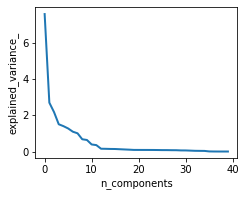

In [71]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA()

pca.fit(X_trainT)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

In [73]:
X_trainT.shape

(2099, 40)